# Use commit counts by day to train an LSTM model to predict next day

Will build 3 separate models and test on training data just for ballpark results. The models are:

1.   Counts unscaled. 30 day chunk. 100 epochs. (lstm_model_v0.h5)
2.   Counts scaled. 30 day chunk. 100 epochs. (lstm_model_v1.h5)
3.   Counts binned into 4 bins. 30 day chunk. 100 epochs. (lstm_model_v2.h5 and (lstm_model_v2b.h5)

Assumes have already run get_commits and wrangle_commits notebooks to produce daily commit counts.



## Caveats

1. Only testing on training data. Need to break out training set and test set.

2. Bins are not well thought out. Not taking into account that 35% of days are 0 commit days and other features of the domain.

3. Used 2 separate projects in combined form. Best if do single project, i.e., a model for each invdividual project. Down the road can build model library with attributes. Get attributes of new project, match with library, and attempt to reuse that model. Cool. Especially useful if not that much training data for new project.







#use if on jupyter server
import json

with open('commit_counts.txt', 'r') as f:

    commit_counts = json.loads(f.read())
    
len(commit_counts)

In [73]:
from google.colab import files
files.upload();                   #commit_counts.txt

Saving commit_counts.txt to commit_counts.txt


In [75]:
import json

with open('commit_counts.txt', 'r') as f:
    commit_counts = json.loads(f.read())
    
len(commit_counts) #2149

2149

In [0]:
#kludge because did not want to mess with uploading commit_counts.txt. Just copy and pasted values.

import numpy as np
commit_counts = np.array([7, 0, 0, 0, 0, 12, 18, 12, 36, 6, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 12, 0, 0, 18, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 12, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 30, 0, 0, 18, 6, 0, 6, 0, 24, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 18, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 18, 0, 0, 0, 12, 0, 0, 0, 6, 0, 12, 6, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 36, 6, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 12, 12, 24, 0, 0, 12, 0, 0, 0, 0, 0, 24, 0, 30, 6, 6, 30, 6, 18, 6, 0, 0, 0, 0, 0, 0, 0, 6, 15, 0, 25, 5, 15, 20, 0, 5, 10, 10, 10, 5, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 50, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 30, 20, 5, 15, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 130, 45, 20, 25, 15, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10, 20, 10, 10, 0, 0, 0, 0, 0, 0, 0, 5, 30, 0, 0, 0, 5, 0, 15, 0, 0, 5, 5, 0, 15, 0, 0, 0, 0, 0, 0, 0, 0, 10, 10, 0, 5, 15, 0, 0, 0, 0, 0, 0, 10, 5, 0, 5, 0, 0, 5, 0, 0, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 15, 0, 10, 0, 10, 10, 0, 30, 10, 35, 0, 0, 0, 0, 0, 0, 0, 10, 0, 0, 0, 0, 0, 20, 10, 20, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 15, 0, 0, 0, 5, 5, 50, 40, 0, 15, 5, 0, 5, 5, 5, 10, 55, 5, 0, 0, 0, 0, 15, 5, 0, 0, 10, 5, 10, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 20, 25, 25, 15, 0, 0, 0, 10, 0, 0, 0, 30, 5, 30, 5, 5, 5, 0, 10, 0, 15, 30, 20, 0, 15, 0, 0, 0, 5, 10, 10, 0, 0, 0, 0, 0, 15, 5, 0, 25, 0, 60, 5, 0, 15, 5, 25, 5, 15, 0, 5, 10, 15, 25, 0, 0, 5, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 10, 0, 0, 0, 0, 0, 0, 0, 15, 30, 0, 15, 5, 0, 0, 5, 5, 5, 0, 5, 0, 0, 5, 0, 0, 15, 0, 0, 0, 15, 5, 0, 40, 10, 0, 0, 25, 5, 5, 0, 0, 9, 4, 4, 20, 12, 8, 0, 16, 0, 12, 8, 4, 8, 0, 4, 0, 32, 12, 4, 12, 8, 0, 4, 8, 0, 4, 0, 0, 0, 0, 8, 0, 8, 0, 20, 8, 36, 12, 0, 8, 12, 0, 0, 52, 16, 24, 48, 0, 0, 0, 8, 8, 16, 4, 8, 0, 0, 4, 0, 4, 8, 4, 0, 0, 0, 0, 0, 8, 16, 8, 0, 4, 0, 8, 8, 8, 0, 0, 0, 0, 16, 0, 12, 8, 0, 0, 4, 0, 4, 0, 0, 0, 0, 8, 12, 12, 4, 0, 0, 0, 4, 8, 0, 0, 0, 0, 0, 9, 0, 0, 0, 0, 0, 4, 8, 4, 4, 0, 4, 0, 0, 0, 8, 0, 8, 0, 16, 32, 0, 24, 0, 0, 0, 0, 4, 20, 0, 0, 0, 0, 0, 0, 0, 0, 16, 8, 32, 0, 4, 16, 0, 16, 4, 0, 60, 16, 0, 16, 20, 16, 0, 12, 0, 0, 0, 8, 12, 0, 12, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 24, 0, 0, 0, 3, 12, 4, 4, 4, 0, 0, 4, 16, 0, 8, 0, 0, 3, 0, 48, 4, 8, 4, 0, 0, 4, 0, 4, 0, 0, 8, 0, 4, 4, 0, 4, 8, 0, 0, 0, 0, 4, 8, 8, 0, 0, 4, 4, 3, 0, 12, 4, 0, 11, 20, 8, 4, 0, 0, 0, 8, 4, 0, 8, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 4, 3, 19, 7, 0, 0, 20, 8, 26, 4, 7, 4, 8, 0, 4, 3, 7, 6, 15, 0, 16, 4, 3, 12, 0, 0, 0, 16, 12, 11, 72, 16, 16, 4, 4, 9, 40, 39, 12, 8, 0, 36, 32, 4, 24, 33, 0, 4, 6, 0, 37, 27, 24, 0, 0, 16, 7, 32, 22, 19, 0, 0, 36, 12, 40, 16, 7, 0, 0, 62, 28, 26, 14, 4, 16, 12, 8, 31, 22, 12, 3, 8, 0, 24, 8, 36, 16, 25, 0, 4, 20, 12, 24, 15, 28, 32, 20, 37, 63, 20, 3, 6, 3, 9, 6, 9, 36, 6, 16, 15, 9, 6, 51, 24, 18, 78, 6, 9, 39, 42, 21, 27, 33, 0, 54, 15, 51, 30, 42, 15, 0, 12, 24, 30, 12, 33, 18, 0, 6, 21, 9, 18, 12, 6, 3, 6, 3, 3, 36, 21, 27, 15, 9, 3, 36, 39, 9, 3, 3, 0, 33, 0, 48, 36, 3, 3, 0, 15, 9, 114, 42, 27, 30, 18, 15, 33, 69, 39, 30, 3, 36, 18, 27, 36, 39, 72, 6, 12, 72, 96, 90, 81, 63, 30, 51, 45, 78, 114, 63, 21, 27, 24, 132, 54, 60, 18, 48, 6, 3, 9, 18, 24, 12, 18, 6, 12, 9, 15, 21, 15, 18, 21, 12, 12, 42, 42, 18, 30, 12, 9, 39, 66, 42, 75, 45, 6, 15, 63, 123, 93, 30, 24, 54, 24, 39, 42, 66, 24, 18, 3, 12, 18, 21, 18, 42, 30, 39, 21, 39, 45, 27, 12, 21, 36, 15, 36, 30, 48, 6, 27, 21, 54, 39, 33, 72, 48, 24, 54, 21, 87, 18, 36, 18, 9, 0, 30, 48, 21, 24, 39, 21, 6, 0, 33, 33, 57, 30, 36, 3, 9, 87, 51, 78, 39, 63, 30, 9, 105, 30, 87, 60, 48, 15, 15, 69, 39, 27, 12, 30, 57, 48, 90, 60, 48, 50, 24, 9, 24, 27, 45, 39, 18, 12, 0, 0, 33, 18, 15, 9, 27, 6, 6, 39, 51, 63, 45, 3, 3, 27, 63, 75, 12, 9, 42, 3, 3, 0, 27, 3, 15, 9, 0, 0, 0, 0, 15, 6, 0, 0, 0, 0, 90, 57, 30, 27, 0, 0, 9, 18, 30, 12, 6, 0, 27, 9, 27, 45, 63, 6, 9, 0, 15, 72, 30, 0, 21, 6, 9, 6, 21, 9, 0, 48, 27, 12, 21, 42, 30, 24, 15, 12, 21, 9, 9, 12, 14, 45, 21, 15, 3, 6, 21, 6, 11, 15, 9, 9, 9, 6, 3, 3, 0, 0, 6, 12, 27, 33, 0, 0, 18, 21, 21, 3, 33, 18, 12, 3, 27, 6, 24, 42, 12, 9, 27, 15, 24, 12, 9, 18, 6, 12, 36, 6, 6, 3, 0, 0, 27, 6, 12, 9, 11, 24, 3, 3, 2, 18, 6, 8, 12, 0, 4, 6, 2, 2, 2, 0, 36, 22, 10, 22, 4, 20, 0, 0, 22, 18, 14, 22, 6, 0, 0, 2, 22, 2, 0, 32, 8, 6, 10, 8, 10, 12, 12, 12, 0, 2, 4, 0, 1, 38, 26, 4, 16, 20, 8, 4, 4, 0, 2, 0, 30, 24, 46, 50, 32, 8, 0, 18, 4, 18, 24, 26, 4, 2, 12, 18, 34, 20, 10, 6, 22, 14, 10, 10, 38, 10, 16, 18, 58, 30, 8, 30, 12, 6, 18, 24, 20, 34, 32, 8, 0, 16, 20, 10, 4, 40, 10, 6, 8, 28, 30, 18, 30, 8, 10, 6, 28, 38, 32, 28, 14, 8, 26, 28, 12, 8, 22, 10, 0, 16, 22, 20, 18, 16, 0, 6, 8, 6, 18, 14, 20, 4, 8, 6, 16, 12, 24, 20, 14, 0, 8, 20, 8, 10, 8, 0, 0, 8, 8, 16, 6, 15, 2, 5, 8, 18, 16, 24, 22, 14, 0, 14, 10, 16, 14, 22, 8, 6, 6, 8, 28, 10, 6, 4, 16, 7, 4, 12, 10, 16, 0, 2, 14, 6, 6, 32, 22, 10, 0, 20, 40, 26, 12, 26, 6, 4, 22, 26, 10, 14, 4, 0, 4, 22, 2, 4, 20, 16, 32, 4, 38, 34, 32, 24, 20, 2, 0, 12, 18, 44, 26, 22, 6, 8, 8, 18, 12, 8, 16, 12, 2, 10, 2, 6, 12, 10, 2, 0, 0, 8, 4, 6, 2, 2, 18, 30, 12, 4, 20, 10, 22, 10, 28, 16, 26, 24, 22, 28, 8, 36, 20, 40, 60, 30, 4, 0, 18, 20, 20, 36, 28, 2, 6, 24, 10, 38, 26, 74, 10, 16, 12, 18, 14, 12, 12, 4, 2, 18, 90, 74, 30, 50, 18, 8, 42, 40, 34, 30, 26, 4, 10, 24, 8, 94, 36, 18, 6, 14, 18, 22, 28, 16, 16, 16, 4, 26, 32, 4, 28, 6, 28, 12, 24, 28, 22, 18, 16, 4, 8, 10, 18, 12, 6, 68, 0, 4, 8, 18, 14, 14, 2, 24, 14, 10, 24, 14, 6, 10, 0, 0, 0, 0, 0, 0, 0, 6, 2, 0, 26, 15, 17, 7, 4, 3, 10, 6, 29, 5, 4, 3, 18, 6, 6, 1, 4, 3, 14, 4, 5, 12, 2, 3, 4, 0, 6, 2, 0, 22, 3, 2, 6, 1, 2, 8, 1, 1, 8, 2, 9, 7, 9, 11, 3, 3, 1, 2, 2, 5, 6, 9, 6, 0, 0, 6, 10, 7, 3, 1, 0, 0, 14, 31, 11, 8, 12, 1, 0, 3, 6, 6, 1, 0, 4, 2, 13, 5, 35, 25, 12, 2, 6, 7, 5, 10, 7, 3, 5, 0, 5, 2, 6, 3, 5, 3, 3, 1, 16, 9, 18, 13, 4, 3, 10, 25, 11, 13, 2, 7, 4, 5, 5, 15, 17, 4, 4, 2, 4, 1, 8, 19, 6, 6, 6, 9, 10, 7, 5, 6, 10, 2, 19, 5, 2, 16, 20, 5, 12, 16, 4, 12, 9, 7, 4, 0, 6, 7, 7, 7, 10, 6, 3, 5, 5, 17, 15, 6, 2, 1, 5, 4, 13, 12, 9, 2, 3, 7, 2, 8, 6, 9, 5, 5, 2, 8, 10, 3, 9, 1, 1, 8, 4, 2, 4, 9, 2, 2, 6, 7, 14, 5, 6, 2, 6, 3, 10, 6, 13, 1, 4, 16, 7, 10, 3, 12, 7, 0, 4, 12, 4, 7, 19, 9, 3, 1, 13, 7, 3, 5, 6, 9, 1, 8, 7, 6, 12, 5, 8, 2, 7, 11, 21, 8, 7, 1, 3, 2, 6, 14, 3, 4, 2, 3, 16, 8, 6, 5, 2, 4, 0, 2, 2, 3, 1, 37, 4, 3, 0, 7, 3, 3, 1, 0, 0, 8, 3, 10, 9, 15, 0, 1, 6, 14, 11, 7, 4, 0, 3, 14, 20, 11, 10, 13, 0, 2, 12, 6, 8, 24, 10, 2, 0, 12, 0, 8, 12, 18, 9, 1, 11, 11, 7, 2, 6, 2, 1, 3, 5, 7, 2, 5, 0, 11, 19, 49, 8, 8, 7, 1, 2, 21, 6, 2, 5, 3, 6, 5, 8, 6, 6, 0, 2, 0, 0, 3, 26, 11, 5, 8, 6, 1, 4, 5, 2, 6, 16, 7, 3, 18, 10, 14, 8, 6, 5, 5, 7, 1, 9, 3, 5, 4, 3, 11, 2, 2])

In [2]:
len(commit_counts)

2149

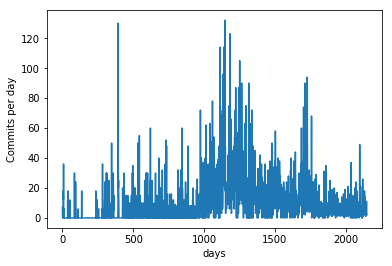

In [3]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.plot(commit_counts)
plt.ylabel('Commits per day')
plt.xlabel('days')
plt.show()

Scale for use later.

In [4]:
max_daily = max(commit_counts)
max_daily

132

In [0]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0, 1))

commit_counts_scaled = scaler.fit_transform(commit_counts.reshape(-1, 1))  

In [6]:
commit_counts[:10]

array([ 7,  0,  0,  0,  0, 12, 18, 12, 36,  6])

In [7]:
print(commit_counts_scaled[:10])

[[0.0530303 ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.09090909]
 [0.13636364]
 [0.09090909]
 [0.27272727]
 [0.04545455]]


## Working on unscaled for now

In [8]:
chunk = 30  #take 30 days in each chunk, stride = 1

features_set = []  
labels =  []  
for i in range(chunk, len(commit_counts)):  
    features_set.append(commit_counts[i-chunk:i])
    labels.append(commit_counts[i])
    
(len(features_set), len(labels))

(2119, 2119)

In [9]:
features_set[-1]  #last 30 day chunk

array([ 3, 26, 11,  5,  8,  6,  1,  4,  5,  2,  6, 16,  7,  3, 18, 10, 14,
        8,  6,  5,  5,  7,  1,  9,  3,  5,  4,  3, 11,  2])

In [10]:
labels[:20]

[0, 0, 0, 0, 0, 0, 0, 12, 0, 0, 18, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [0]:

features_set, labels = np.array(features_set), np.array(labels)  

In [12]:
features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))  
features_set.shape

(2119, 30, 1)

In [13]:
from keras.models import Sequential  
from keras.layers import Dense  
from keras.layers import LSTM  
from keras.layers import Dropout
from keras.models import load_model

Using TensorFlow backend.


# Checkpoint

Code below will halt Run All. Stopping after define features but before starting to define models.

In [0]:
foo_fum_fie()  #bogus function call

In [0]:
model = Sequential()  


In [0]:
model.add(LSTM(units=50, return_sequences=True, input_shape=(features_set.shape[1], 1)))  


In [0]:
model.add(Dropout(0.2))  



In [0]:
model.add(LSTM(units=50, return_sequences=True))  
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))  
model.add(Dropout(0.2))

model.add(LSTM(units=50))  
model.add(Dropout(0.2))  

In [0]:
model.add(Dense(units = 1))  


In [0]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')  


In [0]:
'''
Epoch 100/100
1023/1023 [==============================] - 3s 3ms/step - loss: 12.6163
'''
model.fit(features_set, labels, epochs = 100, batch_size = 32)  


## Write model out to gdrive

In [22]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
# save model to single file
model.save('/content/gdrive/My Drive/lstm_model_v0.h5')

Make sure we can load it again.

In [0]:
#from keras.models import load_model # load model from single file
#model_test = load_model('/content/gdrive/My Drive/lstm_model_v0.h5') # make predictions


In [0]:
#Try on training set for giggles
check_predictions = []

for  i,chunk in enumerate(features_set):
  chunk = np.reshape(chunk, (1, features_set.shape[1], 1))
  yhat = model.predict(chunk, verbose=0)
  check_predictions.append((yhat, labels[i], abs(yhat-labels[i])))  #(prediction, actual, abs diff)


In [25]:
check_predictions[:10]

[(array([[0.42539477]], dtype=float32),
  0,
  array([[0.42539477]], dtype=float32)),
 (array([[0.11111295]], dtype=float32),
  0,
  array([[0.11111295]], dtype=float32)),
 (array([[0.39133996]], dtype=float32),
  0,
  array([[0.39133996]], dtype=float32)),
 (array([[0.7249146]], dtype=float32), 0, array([[0.7249146]], dtype=float32)),
 (array([[1.1564618]], dtype=float32), 0, array([[1.1564618]], dtype=float32)),
 (array([[1.4801731]], dtype=float32), 0, array([[1.4801731]], dtype=float32)),
 (array([[3.0525913]], dtype=float32), 0, array([[3.0525913]], dtype=float32)),
 (array([[3.4147964]], dtype=float32), 12, array([[8.585203]], dtype=float32)),
 (array([[4.4207153]], dtype=float32), 0, array([[4.4207153]], dtype=float32)),
 (array([[4.4364514]], dtype=float32), 0, array([[4.4364514]], dtype=float32))]

Average (absolute) difference.

In [26]:
sum([d for x,y,d in check_predictions])/len(check_predictions)  #5.316563

array([[5.2712665]], dtype=float32)

MSE

In [27]:
sum([d**2 for x,y,d in check_predictions])/len(check_predictions)  #70.68988

array([[70.7989]], dtype=float32)

## Kind of interesting

How many predictions are off by a given difference:
<pre>
(0, 0.0438886267107126)              #got 4% dead on
(1, 0.21378008494572912)
(2, 0.16281264747522417)
(3, 0.12081170363378953)
(4, 0.08117036337895234)            #62% within 4 out of max 132
(5, 0.06370929683813119)
(6, 0.045304388862671074)
(7, 0.042000943841434636)
(8, 0.038225578102878716)
(9, 0.030202925908447382)
</pre>

In [28]:
#round prediction and compare that with actual

for i in range(10):
  print((i, len([1 for y,x,d in check_predictions if abs(x-np.round(y))==float(i)])/len(check_predictions)))

(0, 0.0778669183577159)
(1, 0.15998112317130722)
(2, 0.16941953751769703)
(3, 0.12364322793770646)
(4, 0.09532798489853704)
(5, 0.06890042472864559)
(6, 0.052855120339782916)
(7, 0.04105710240679566)
(8, 0.030202925908447382)
(9, 0.02878716375648891)


# Try with scaled features



In [29]:
commit_counts[:10]

array([ 7,  0,  0,  0,  0, 12, 18, 12, 36,  6])

In [30]:
commit_counts_scaled[:10]

array([[0.0530303 ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.09090909],
       [0.13636364],
       [0.09090909],
       [0.27272727],
       [0.04545455]])

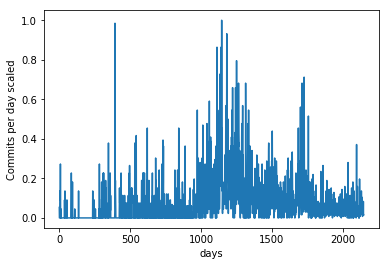

In [31]:
plt.plot(commit_counts_scaled)
plt.ylabel('Commits per day scaled')
plt.xlabel('days')
plt.show()

## Working on scaled

In [32]:
chunk = 30  #take 30 days in each chunk

scaled_features_set = []  
scaled_labels =  []  
for i in range(chunk, len(commit_counts_scaled)):  
    scaled_features_set.append(commit_counts_scaled[i-chunk:i])
    scaled_labels.append(commit_counts_scaled[i])
    
(len(scaled_features_set), len(scaled_labels))

(2119, 2119)

In [0]:
scaled_features_set[-1]  #last 30 day chunk

In [0]:
scaled_labels[:20]

In [0]:

scaled_features_set, scaled_labels = np.array(scaled_features_set), np.array(scaled_labels)  

In [36]:
scaled_features_set = np.reshape(scaled_features_set, (scaled_features_set.shape[0], scaled_features_set.shape[1], 1))  
scaled_features_set.shape

(2119, 30, 1)

In [0]:
model = Sequential()  


In [0]:
model.add(LSTM(units=50, return_sequences=True, input_shape=(features_set.shape[1], 1)))  


In [0]:
model.add(Dropout(0.2))  



In [0]:
model.add(LSTM(units=50, return_sequences=True))  
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))  
model.add(Dropout(0.2))

model.add(LSTM(units=50))  
model.add(Dropout(0.2))  

In [0]:
model.add(Dense(units = 1))  


In [0]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')  


In [0]:
'''
Epoch 100/100
1023/1023 [==============================] - 3s 3ms/step - loss: 0.0047
'''
model.fit(scaled_features_set, scaled_labels, epochs = 100, batch_size = 32)  


## Write model out to gdrive

In [44]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
# save model to single file
model.save('/content/gdrive/My Drive/lstm_model_v1.h5')

Make sure we can load it again.

In [0]:
#from keras.models import load_model # load model from single file
#model_test = load_model('/content/gdrive/My Drive/lstm_model_v1.h5') # make predictions


In [0]:
#Try on training set for giggles
check_predictions = []

for  i,chunk in enumerate(scaled_features_set):
  chunk = np.reshape(chunk, (1, scaled_features_set.shape[1], 1))
  yhat = model.predict(chunk, verbose=0)
  check_predictions.append((yhat, scaled_labels[i], abs(yhat-scaled_labels[i])))


In [47]:
check_predictions[:10]

[(array([[0.03580192]], dtype=float32), array([0.]), array([[0.03580192]])),
 (array([[0.03311154]], dtype=float32), array([0.]), array([[0.03311154]])),
 (array([[0.03151471]], dtype=float32), array([0.]), array([[0.03151471]])),
 (array([[0.03120288]], dtype=float32), array([0.]), array([[0.03120288]])),
 (array([[0.03160755]], dtype=float32), array([0.]), array([[0.03160755]])),
 (array([[0.03186058]], dtype=float32), array([0.]), array([[0.03186058]])),
 (array([[0.03133972]], dtype=float32), array([0.]), array([[0.03133972]])),
 (array([[0.03031779]], dtype=float32),
  array([0.09090909]),
  array([[0.0605913]])),
 (array([[0.03879401]], dtype=float32), array([0.]), array([[0.03879401]])),
 (array([[0.03582741]], dtype=float32), array([0.]), array([[0.03582741]]))]

Average (absolute) difference.

In [48]:
sum([d for y,x,d in check_predictions])/len(check_predictions)  #0.05848879

array([[0.05862212]])

MSE

In [49]:
sum([d**2 for y,x,d in check_predictions])/len(check_predictions)  #0.00789343

array([[0.00797862]])

In [50]:
labels[:10]

array([ 0,  0,  0,  0,  0,  0,  0, 12,  0,  0])

In [53]:
[y*max_daily for y,x,d in check_predictions][:10]

[array([[4.725854]], dtype=float32),
 array([[4.370723]], dtype=float32),
 array([[4.1599417]], dtype=float32),
 array([[4.1187797]], dtype=float32),
 array([[4.172197]], dtype=float32),
 array([[4.2055964]], dtype=float32),
 array([[4.136843]], dtype=float32),
 array([[4.001949]], dtype=float32),
 array([[5.12081]], dtype=float32),
 array([[4.7292185]], dtype=float32)]

Check out actual unscaled value (between 0 and 132) with scaled prediction times daily max.

In [54]:
sum([ abs(val-(check_predictions[i][0]*max_daily)) for i,val in enumerate(labels)])/len(scaled_labels) #7.6242685
  

array([[7.738123]], dtype=float32)

Unscaled abs diff average was only 5.31.

# Now try binning

Bin into 4 bins arbitrarily using glance at plot of unscaled counts.
<p>
  <img src='https://www.dropbox.com/s/nypu0ely8hbt0sg/unscaled_commits_v0.png?raw=1'>

## Past Results

<pre>
bin1 = 5
bin2 = 10
bin3 = 20
#bin4 is anything over 20
Epoch 100/100
1023/1023  loss: 0.3127
(0, 0.5747994336951392)
(1, 0.36290703161868804)
(2, 0.05427088249174139)
(3, 0.008022652194431336)

=========================

bin1 = 10
bin2 = 40
bin3 = 60
#bin4 is anything over 60
Epoch 100/100
2119/2119- loss: 0.2153
(0, 0.7748938178386031)
(1, 0.21378008494572912)
(2, 0.009910335063709298)
(3, 0.001415762151958471)

=========================

</pre>

In [0]:
bin1 = 10
bin2 = 40
bin3 = 60
#bin4 is anything over 60

## Note

Might want to consider 0 commits in its own bin. Depends if there is a qualitative difference between 0 and not 0. Maybe if know 0 commits for next day, can avoid doing something. But if non 0, then will have to do it no matter.

Or not. Just brainstorming.

In [0]:
binned_counts = []

for c in commit_counts:
  if c <= bin1:
    binned_counts.append(0)
    continue
    
  if c <= bin2:
    binned_counts.append(1)
    continue
    
  if c <= bin3:
    binned_counts.append(2)
    continue
    
  binned_counts.append(3)  # > bin3

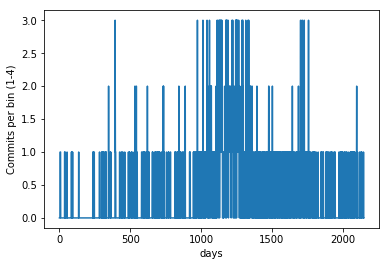

In [57]:
plt.plot(binned_counts)
plt.ylabel('Commits per bin (1-4)')
plt.xlabel('days')
plt.show()

In [58]:
chunk = 30  #take 30 days in each chunk

binned_features_set = []  
binned_labels =  []  
for i in range(chunk, len(binned_counts)):  
    binned_features_set.append(binned_counts[i-chunk:i])
    binned_labels.append(binned_counts[i])
    
(len(binned_features_set), len(binned_labels))

(2119, 2119)

In [59]:
print(binned_features_set[-1])  #last 30 day chunk

[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]


In [60]:
binned_labels[:20]

[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [0]:

binned_features_set, binned_labels = np.array(binned_features_set), np.array(binned_labels)  

In [62]:
binned_features_set = np.reshape(binned_features_set, (binned_features_set.shape[0], binned_features_set.shape[1], 1))  
binned_features_set.shape

(2119, 30, 1)

In [0]:
model = Sequential()  


In [0]:
model.add(LSTM(units=50, return_sequences=True, input_shape=(features_set.shape[1], 1)))  


In [0]:
model.add(Dropout(0.2))  



In [0]:
model.add(LSTM(units=50, return_sequences=True))  
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))  
model.add(Dropout(0.2))

model.add(LSTM(units=50))  
model.add(Dropout(0.2))  

In [0]:
model.add(Dense(units = 1))  


In [0]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')  


In [69]:
'''
Epoch 100/100
1023/1023 [==============================] - 3s 3ms/step - loss: 0.2153
'''
model.fit(binned_features_set, binned_labels, epochs = 100, batch_size = 32)  


Epoch 1/100
2119/2119 [==============================] - 9s 4ms/step - loss: 0.3437
Epoch 2/100
2119/2119 [==============================] - 6s 3ms/step - loss: 0.3223
Epoch 3/100
2119/2119 [==============================] - 6s 3ms/step - loss: 0.3175
Epoch 4/100
2119/2119 [==============================] - 6s 3ms/step - loss: 0.3228
Epoch 5/100
2119/2119 [==============================] - 6s 3ms/step - loss: 0.3158
Epoch 6/100
2119/2119 [==============================] - 6s 3ms/step - loss: 0.3105
Epoch 7/100
2119/2119 [==============================] - 6s 3ms/step - loss: 0.3129
Epoch 8/100
2119/2119 [==============================] - 6s 3ms/step - loss: 0.3097
Epoch 9/100
2119/2119 [==============================] - 6s 3ms/step - loss: 0.3105
Epoch 10/100
2119/2119 [==============================] - 6s 3ms/step - loss: 0.3067
Epoch 11/100
2119/2119 [==============================] - 6s 3ms/step - loss: 0.3076
Epoch 12/100
2119/2119 [==============================] - 6s 3ms/step - lo

## Write model out to gdrive

In [70]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
# save model to single file
model.save('/content/gdrive/My Drive/lstm_model_v2_b.h5')

Make sure we can load it again.

In [0]:
#from keras.models import load_model # load model from single file
#model = load_model('/content/gdrive/My Drive/lstm_model_v2.h5') # make predictions


In [0]:
#Try on training set for giggles
check_predictions = []

for  i,chunk in enumerate(binned_features_set):
  chunk = np.reshape(chunk, (1, binned_features_set.shape[1], 1))
  yhat = model.predict(chunk, verbose=0)
  check_predictions.append((yhat, binned_labels[i], abs(yhat-binned_labels[i])))


In [77]:
check_predictions[:10]

[(array([[0.1076444]], dtype=float32), 0, array([[0.1076444]], dtype=float32)),
 (array([[0.10665783]], dtype=float32),
  0,
  array([[0.10665783]], dtype=float32)),
 (array([[0.11028719]], dtype=float32),
  0,
  array([[0.11028719]], dtype=float32)),
 (array([[0.10969108]], dtype=float32),
  0,
  array([[0.10969108]], dtype=float32)),
 (array([[0.10231475]], dtype=float32),
  0,
  array([[0.10231475]], dtype=float32)),
 (array([[0.09864269]], dtype=float32),
  0,
  array([[0.09864269]], dtype=float32)),
 (array([[0.09835397]], dtype=float32),
  0,
  array([[0.09835397]], dtype=float32)),
 (array([[0.09607128]], dtype=float32),
  1,
  array([[0.9039287]], dtype=float32)),
 (array([[0.17877875]], dtype=float32),
  0,
  array([[0.17877875]], dtype=float32)),
 (array([[0.20513232]], dtype=float32),
  0,
  array([[0.20513232]], dtype=float32))]

Average (absolute) difference.

In [78]:
sum([d for y,x,d in check_predictions])/len(check_predictions)  #array([[0.35177565]], dtype=float32)

array([[0.34836322]], dtype=float32)

MSE

In [79]:
sum([d**2 for y,x,d in check_predictions])/len(check_predictions)  #array([[0.2961716]], dtype=float32)

array([[0.23707537]], dtype=float32)

Percentages of bin diff.
<pre>
(0, 0.756488909863143)
(1, 0.2298253893345918)
(2, 0.012269938650306749)
(3, 0.001415762151958471)
</pre>

In [80]:
for i in range(4):
  print((i, len([1 for y,x,d in check_predictions if abs(x-np.round(y))==float(i)])/len(check_predictions)))

(0, 0.756488909863143)
(1, 0.2298253893345918)
(2, 0.012269938650306749)
(3, 0.001415762151958471)
